In [1]:
import numpy as np
import pandas as pd
import random

from diurnal_misinformation.path_utils import save_to_latex
from diurnal_misinformation.similarity_utils import SimilarityRoutine
from diurnal_misinformation.config import ItalyConfig
from diurnal_misinformation.enums import Clusters

In [2]:
random_seed = 12
np.random.seed(random_seed)
random.seed(random_seed)
config = ItalyConfig()
routine = SimilarityRoutine(config, index_slice=Clusters.order())

# Distances by activity curve features

If we assume that each chronotype follows similar behavioral patterns but with a time delay depending on their wake-up time, we should see that the curve of their susceptibility over time approaches that of other clusters when aligning the curves by similarity.

We have a few options for aligning by similarity:

We may align by what we estimate is the wake-up time. While we cannot infer the wake-up time per se, we can infer the time when users are usually not asleep, as they are active on Twitter. Therefore, we can estimate that the nadir of their activity is when they are fast asleep.
We consider the user to be asleep within the 8 consecutive hours that they are least active during the day.

Other options are
- the first inflection after the minimum activity (when the slope changes starts getting shallower)
- the first peak after the minimum activity
- the steepest ascent
- ...

## By user

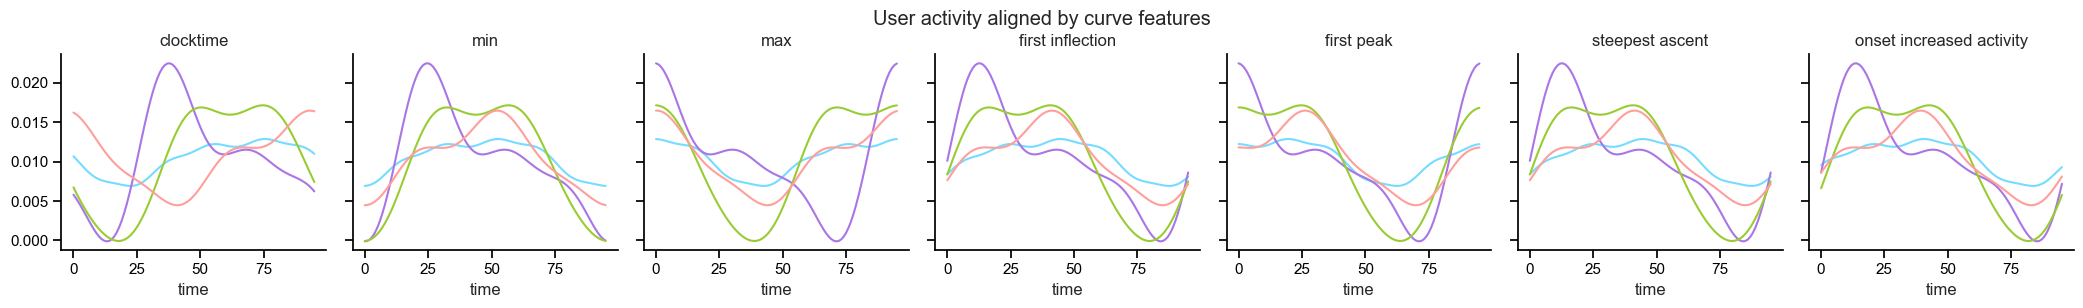

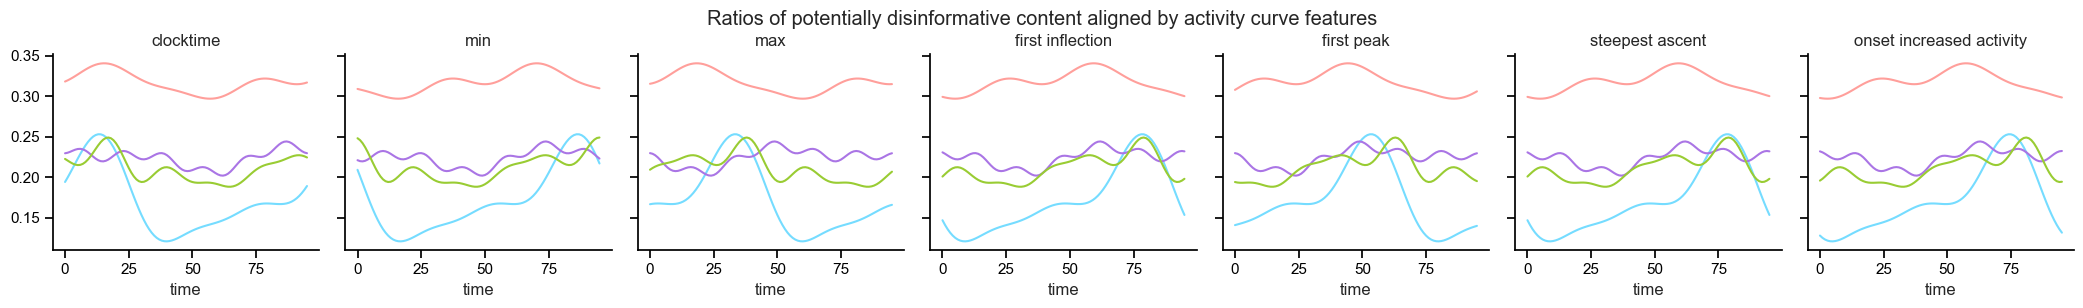

In [5]:
similarity_by_user = routine.by_user('all', index_slice=Clusters.order())

<p id="SupplTab4a">Supplementary Table 4(a)</p>

In [11]:
similarity_by_user.distance_ratio_by_activity_curve_features

,pcm,frechet,area_between_two_curves,curve_length_measure,dtw,mae,mse
clocktime,4.1e+01,1.3e-01,1.9e+00,4.0e+00,7.9e+00,4.1e-02,4.7e-03
min,2.6e+01,1.2e-01,2.0e+00,3.9e+00,7.9e+00,4.1e-02,4.8e-03
max,3.6e+01,1.3e-01,2.0e+00,4.0e+00,8.0e+00,4.1e-02,4.9e-03
first inflection,1.7e+01,1.3e-01,1.9e+00,4.0e+00,7.8e+00,4.1e-02,4.8e-03
first peak,2.8e+01,1.3e-01,1.9e+00,3.9e+00,7.9e+00,4.1e-02,4.8e-03
steepest ascent,1.7e+01,1.3e-01,1.9e+00,4.0e+00,7.8e+00,4.1e-02,4.8e-03
onset increased activity,1.7e+01,1.3e-01,1.9e+00,4.1e+00,7.8e+00,4.1e-02,4.8e-03


In [29]:
save_to_latex(
    config,
    similarity_by_user.distance_ratio_by_activity_curve_features,
    f'similarity_ratio_by_activity_fourier_all',
    r"Distance metrics for the ratio of potentially disinformative content when aligned by features of the cluster activity curves.",
    is_multi_index=False
)

## By tweet

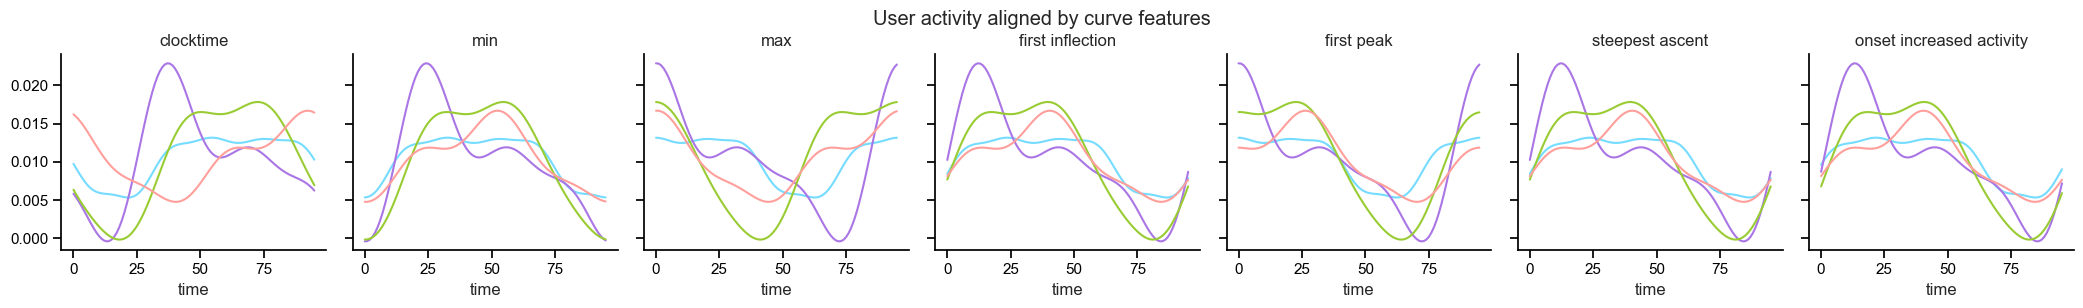

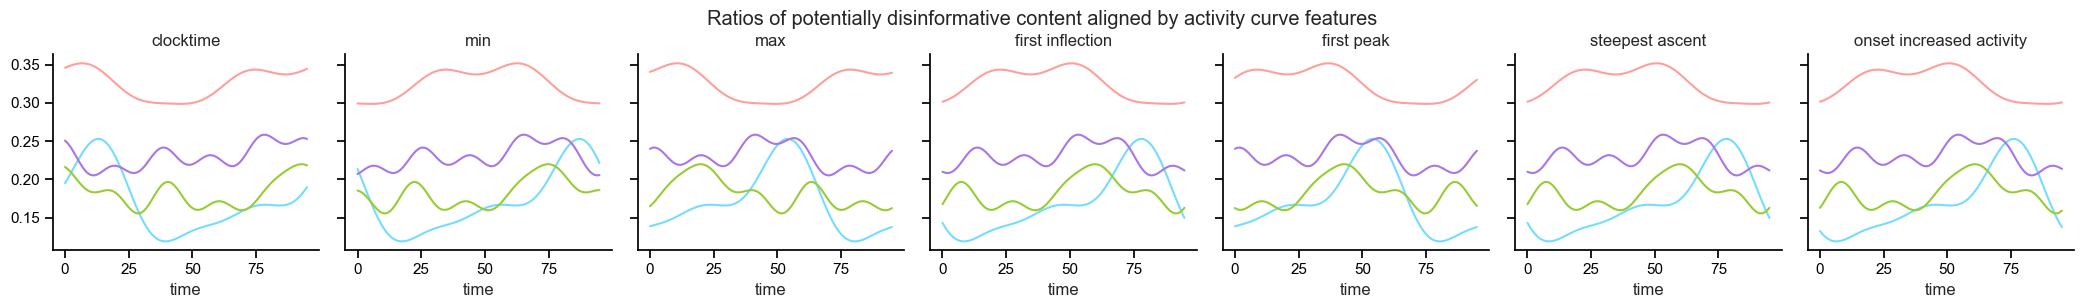

In [30]:
similarity_by_tweet = routine.by_tweet('all', index_slice=Clusters.order())

In [31]:
similarity_by_tweet.distance_activity_by_curve_featuressimilarity_by_tweet.distance_activity_by_curve_features

,pcm,frechet,area_between_two_curves,curve_length_measure,dtw,mae,mse
clocktime,2.2e+01,8.3e-03,9.1e-02,3.3e+00,3.7e-01,1.9e-03,1.0e-05
min,1.7e+01,6.6e-03,6.4e-02,3.0e+00,2.6e-01,1.3e-03,6.0e-06
max,1.7e+01,9.1e-03,1.0e-01,3.3e+00,4.1e-01,2.1e-03,1.4e-05
first inflection,1.6e+01,6.7e-03,6.7e-02,3.0e+00,2.7e-01,1.4e-03,6.3e-06
first peak,1.6e+01,7.1e-03,7.2e-02,3.1e+00,2.9e-01,1.5e-03,7.5e-06
steepest ascent,1.6e+01,6.7e-03,6.7e-02,3.0e+00,2.7e-01,1.4e-03,6.3e-06
onset increased activity,2.0e+01,6.6e-03,6.4e-02,3.1e+00,2.6e-01,1.3e-03,5.8e-06


In [32]:
similarity_by_tweet.distance_ratio_by_activity_curve_features

,pcm,frechet,area_between_two_curves,curve_length_measure,dtw,mae,mse
clocktime,4.3e+01,1.3e-01,2.0e+00,4.3e+00,8.3e+00,4.3e-02,5.3e-03
min,2.6e+01,1.3e-01,2.0e+00,4.0e+00,8.0e+00,4.2e-02,5.5e-03
max,2.9e+01,1.4e-01,2.0e+00,4.2e+00,8.1e+00,4.2e-02,5.6e-03
first inflection,1.7e+01,1.3e-01,2.0e+00,4.3e+00,8.3e+00,4.3e-02,5.6e-03
first peak,2.8e+01,1.2e-01,1.9e+00,3.9e+00,7.8e+00,4.1e-02,5.2e-03
steepest ascent,1.7e+01,1.3e-01,2.0e+00,4.3e+00,8.3e+00,4.3e-02,5.6e-03
onset increased activity,1.6e+01,1.3e-01,2.0e+00,4.4e+00,8.1e+00,4.2e-02,5.5e-03
